In [1]:
import json
from pprint import pprint
import pandas as pd
import numpy as np
from IPython.display import display, HTML, Image
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook
from IPython.display import SVG
from keras.models import Model, model_from_json
from keras.layers import Input, Dense, LSTM, concatenate, Reshape
from keras.utils.vis_utils import plot_model, model_to_dot
from keras.utils import plot_model
from keras.optimizers import Adam, SGD

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
train_fl_nm = '/Users/jaydeep/jaydeep_workstation/ASU/Research/oaei/source_data.json'
with open(train_fl_nm) as f:
    train_data = json.load(f)
    train_data_X = []
    train_data_Y = []
    for key in train_data.keys():
        hierarchies = train_data[key]['hierarchy']
        for hierarchy in hierarchies:
            tmp = []
            words = hierarchy.split('|')
            for word in words:
                if word in train_data:
                    tmp.append(train_data[word]['vector'])
            train_data_X.append(tmp)
            train_data_Y.append(train_data[key]['vector'])

In [3]:
train_data_X = np.array(train_data_X)
train_data_Y = np.array(train_data_Y)
pprint(train_data_X.shape)
pprint(train_data_Y.shape)

(29753,)
(29753, 32)


In [4]:
def mixed_net():
    hichy_ip = Input(shape = (None,32))
    hichy1 = LSTM(64, stateful = False)(hichy_ip)
    #hichy2 = LSTM(n_neurons, stateful = True, return_sequences=True)(hichy1)\\n\",\n",
    #hichy2 = LSTM(32, stateful = True)(hichy1)\\n\",\n",
    hichy3 = Dense(32, activation='sigmoid')(hichy1)
    model = Model(inputs=hichy_ip,outputs=hichy3)
    opt=Adam(lr=0.0001)
    l_val = 'binary_crossentropy'
    #l_val = \\\"mean_squared_error\\\"\\n\",\n",
    #opt = SGD(lr=0.0001, decay=1e-6, momentum=0.9, nesterov=True)\\n\",\n",
    model.compile(loss=l_val, optimizer=opt)
    return model

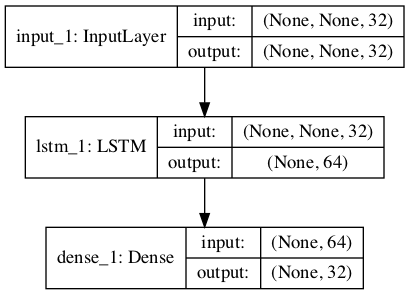

In [5]:
model = mixed_net()
plot_model(model, to_file='onto_model.png', show_shapes=True)
Image(filename='onto_model.png')

In [6]:
import datetime
print(datetime.datetime.now())
for t_x, t_y in zip(train_data_X, train_data_Y):
    t_x = np.array(t_x)
    t_y = np.array(t_y)
    t_x = t_x.reshape(1, t_x.shape[0], t_x.shape[1])
    t_y = t_y.reshape(1, t_y.shape[0])
    model.fit(t_x, t_y, batch_size =1, epochs = 100,  verbose = 0)
print(datetime.datetime.now())

2018-10-05 21:55:07.525887
2018-10-06 02:53:11.327415


In [7]:
model_nm = '/Users/jaydeep/jaydeep_workstation/ASU/Research/oaei/my_model.h5'
model.save(model_nm)